<div style="display: flex; background-color: RGB(255,114,0);" >
<h1 style="margin: auto; padding: 30px; ">DETECTEZ DES FAUX BILLETS</h1>
</div>

OBJECTIF DE CE NOTEBOOK Bienvenue dans l'outil plébiscité par les analystes de données Jupyter.

Il s'agit d'un outil permettant de mixer et d'alterner codes, textes et graphique.

Cet outil est formidable pour plusieurs raisons:

il permet de tester des lignes de codes au fur et à mesure de votre rédaction, de constater immédiatement le résultat d'un instruction, de la corriger si nécessaire. De rédiger du texte pour expliquer l'approche suivie ou les résultats d'une analyse et de le mettre en forme grâce à du code html ou plus simple avec Markdown d'agrémenter de graphiques Pour vous aider dans vos premiers pas à l'usage de Jupyter et de Python, nous avons rédigé ce notebook en vous indiquant les instructions à suivre.

Il vous suffit pour cela de saisir le code Python répondant à l'instruction donnée.

Vous verrez de temps à autre le code Python répondant à une instruction donnée mais cela est fait pour vous aider à comprendre la nature du travail qui vous est demandée.

Et garder à l'esprit, qu'il n'y a pas de solution unique pour résoudre un problème et qu'il y a autant de résolutions de problèmes que de développeurs ;)...

<div style="background-color: RGB(51,165,182);" >
<h2 style="margin: auto; padding: 20px; color:#fff; ">Etape 1 - Importation des librairies et chargement des fichiers</h2>
</div>

<div style="border: 1px solid RGB(51,165,182);" >
<h3 style="margin: auto; padding: 20px; color: RGB(51,165,182); ">1.1 - Importation des librairies</h3>
</div>

In [19]:
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
from matplotlib.ticker import MaxNLocator
import seaborn as sns
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.cluster import KMeans
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.metrics import silhouette_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from scipy.stats import mode
from ipywidgets import widgets
from scipy.stats import ttest_ind
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay, accuracy_score
from statsmodels.formula.api import ols
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.stats.diagnostic import het_breuschpagan
from scipy.stats import shapiro
import seaborn as sns
import statsmodels.api as sm
import os
import warnings
warnings.filterwarnings('ignore')

<div style="border: 1px solid RGB(51,165,182);" >
<h3 style="margin: auto; padding: 20px; color: RGB(51,165,182); ">1.2 - Chargements des fichiers</h3>
</div>

In [20]:
df_billet= pd.read_csv('billets.csv', delimiter=';')

In [21]:
df_billet.head()

,is_genuine,diagonal,height_left,height_right,margin_low,margin_up,length
0,True,171.81,104.86,104.95,4.52,2.89,112.83
1,True,171.46,103.36,103.66,3.77,2.99,113.09
2,True,172.69,104.48,103.50,4.40,2.94,113.16
3,True,171.36,103.91,103.94,3.62,3.01,113.51
4,True,171.73,104.28,103.46,4.04,3.48,112.54


<div style="background-color: RGB(51,165,182);" >
<h2 style="margin: auto; padding: 20px; color:#fff; ">Etape 2 - Analyse exploratoire du fichier</h2>
</div>

In [22]:
print(df_billet.shape)
df_billet.info()

(1500, 7)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   is_genuine    1500 non-null   bool   
 1   diagonal      1500 non-null   float64
 2   height_left   1500 non-null   float64
 3   height_right  1500 non-null   float64
 4   margin_low    1463 non-null   float64
 5   margin_up     1500 non-null   float64
 6   length        1500 non-null   float64
dtypes: bool(1), float64(6)
memory usage: 71.9 KB


In [23]:
df_billet.isnull().sum()

is_genuine       0
diagonal         0
height_left      0
height_right     0
margin_low      37
margin_up        0
length           0
dtype: int64

# Analyse des variables numériques
### Les caractéristiques des billets selon qu'ils soient vrais ou faux
#### Visualisation des variables

Observons la relation entre les variables 2 par 2.

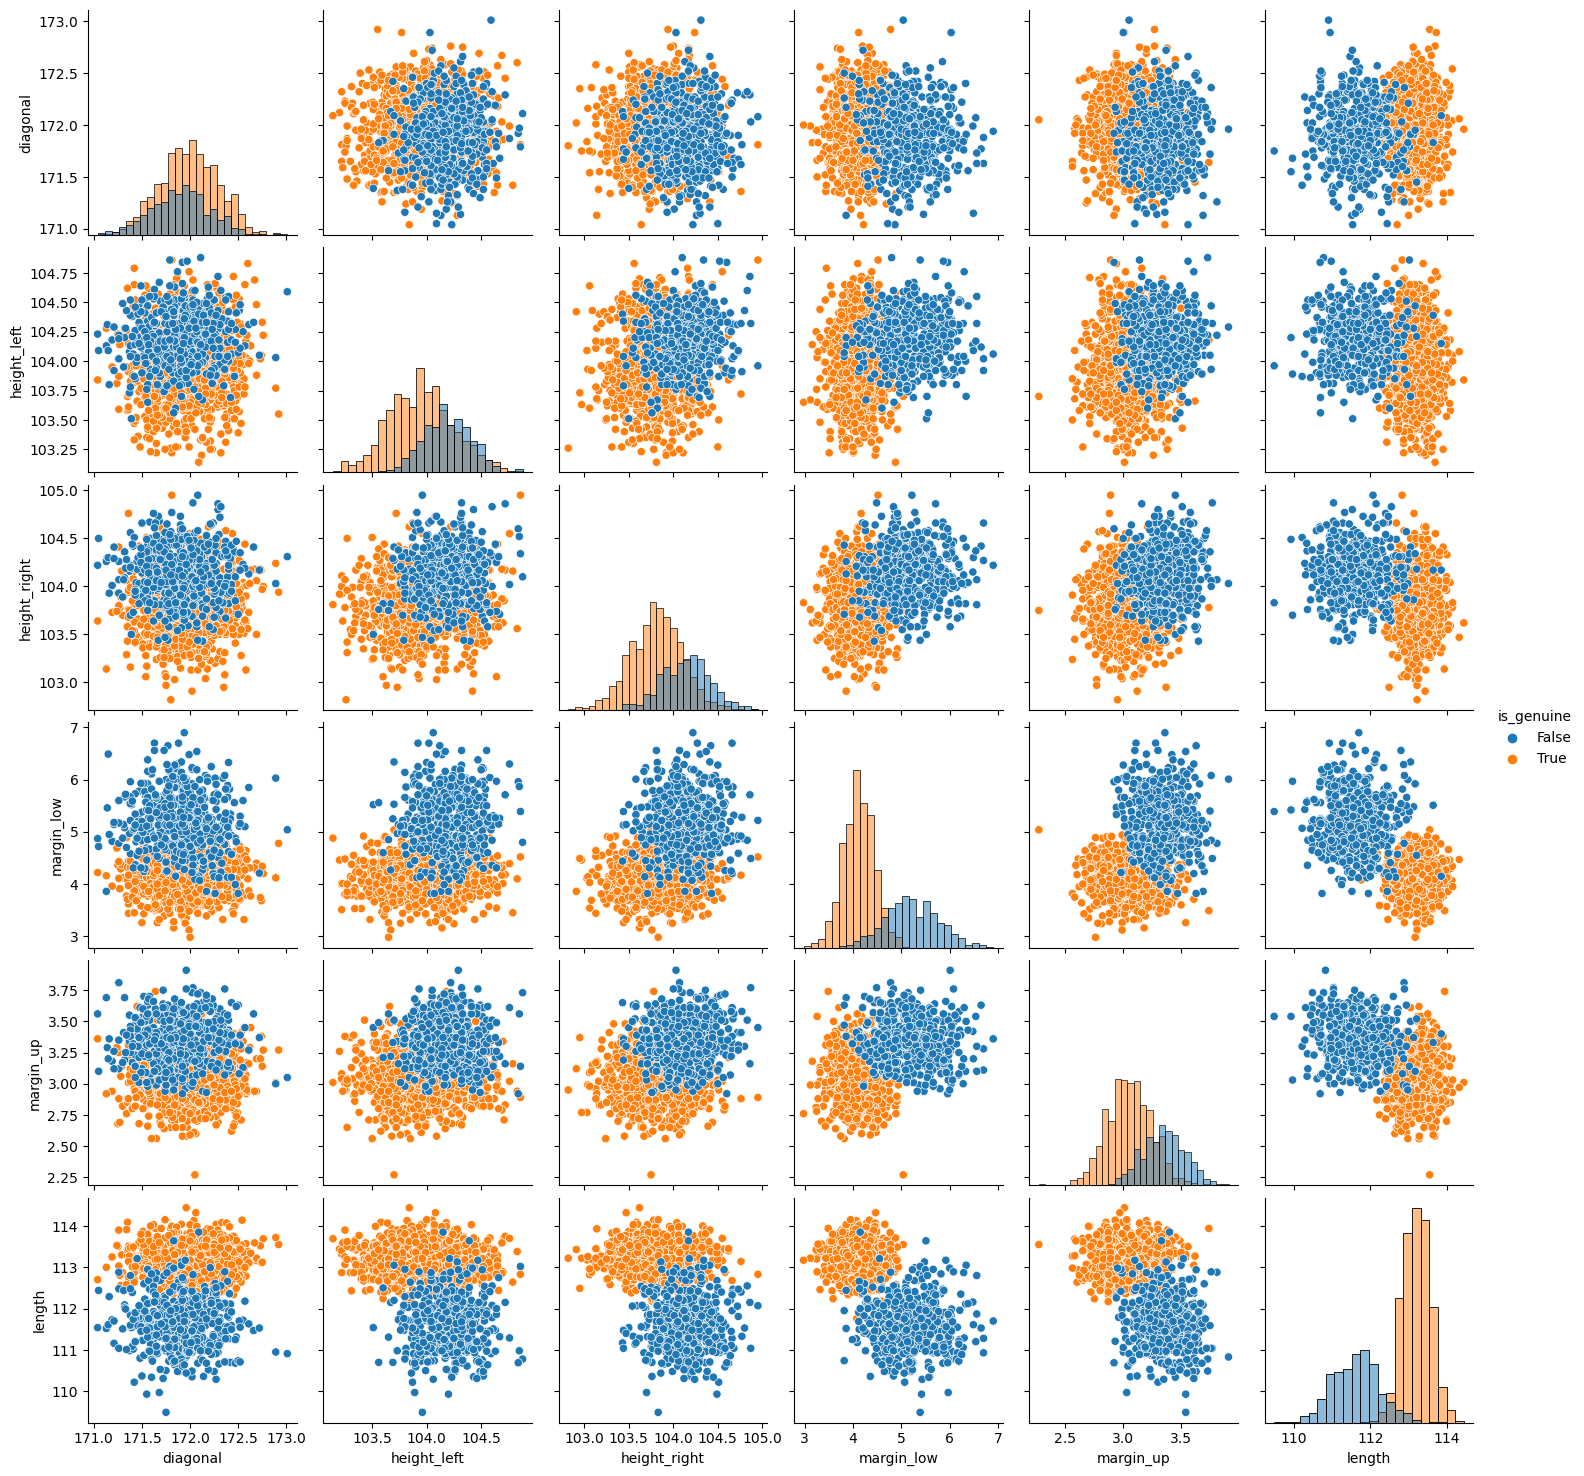

In [24]:
sns.pairplot(data=df_billet, hue='is_genuine', diag_kind='hist')
plt.show()

In [25]:
billet_vrai=df_billet[df_billet['is_genuine']==True]
billet_faux= df_billet[df_billet['is_genuine']==False]

In [26]:
billet_vrai.head()

,is_genuine,diagonal,height_left,height_right,margin_low,margin_up,length
0,True,171.81,104.86,104.95,4.52,2.89,112.83
1,True,171.46,103.36,103.66,3.77,2.99,113.09
2,True,172.69,104.48,103.50,4.40,2.94,113.16
3,True,171.36,103.91,103.94,3.62,3.01,113.51
4,True,171.73,104.28,103.46,4.04,3.48,112.54


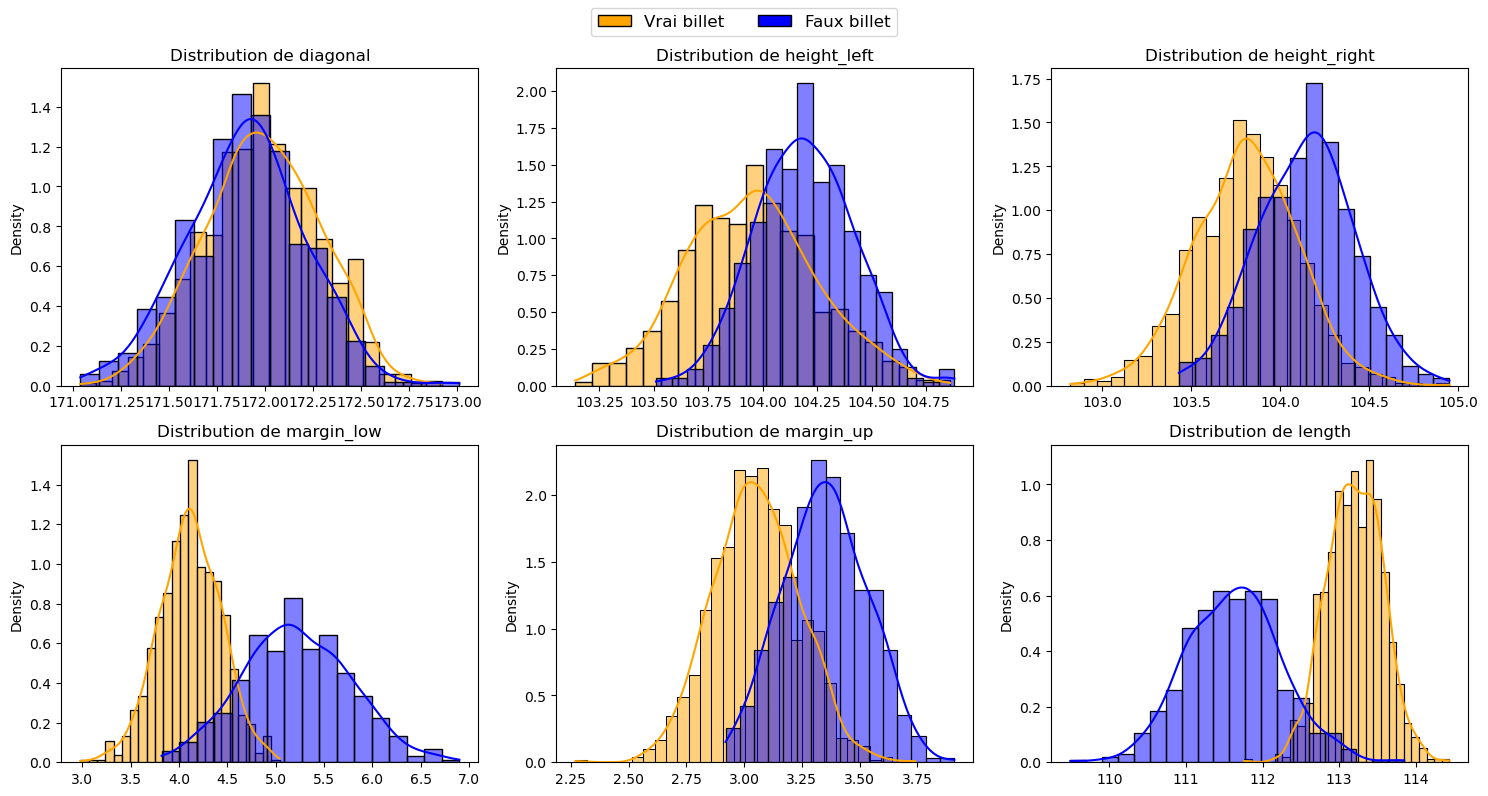

In [27]:
from matplotlib.patches import Patch

colonnes = df_billet.columns[1:]
n = len(colonnes)
ncols = 3
nrows = math.ceil(n / ncols)

fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(5 * ncols, 4 * nrows))
axes = axes.flatten()

for i, col in enumerate(colonnes):
    sns.histplot(billet_vrai[col], ax=axes[i], kde=True, stat="density", color="orange", alpha=0.5)
    sns.histplot(billet_faux[col], ax=axes[i], kde=True, stat="density", color="blue", alpha=0.5)
    axes[i].set_title(f'Distribution de {col}')
    axes[i].set_xlabel('')

# Supprimer les axes vides
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

# Création de la légende manuelle
legend_elements = [
    Patch(facecolor='orange', edgecolor='black', label='Vrai billet'),
    Patch(facecolor='blue', edgecolor='black', label='Faux billet')
]
fig.legend(handles=legend_elements, loc='upper center', ncol=2, fontsize='large')

plt.tight_layout(rect=[0, 0, 1, 0.96])  # Pour ne pas écraser la légende
plt.show()

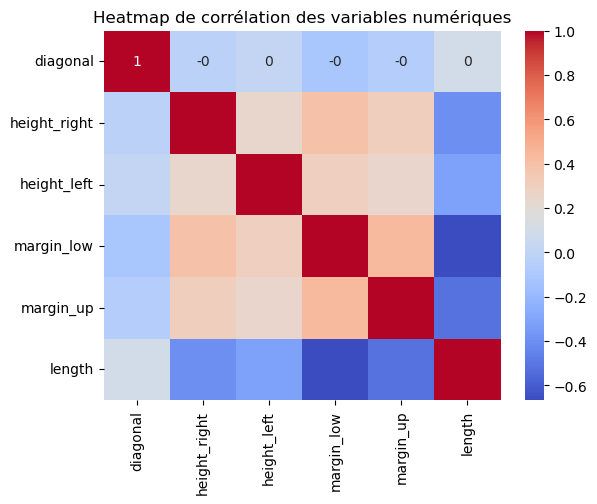

In [28]:
var_num = df_billet[['diagonal','height_right', 'height_left','margin_low', 'margin_up', 'length']]

corr = var_num.corr() 
sns.heatmap(corr, annot=True, fmt='.0f',cmap="coolwarm")
plt.title('Heatmap de corrélation des variables numériques')
plt.show()

In [29]:
print(corr)

              diagonal  height_right  height_left  margin_low  margin_up  \
diagonal      1.000000     -0.024492     0.019472   -0.111534  -0.055649   
height_right -0.024492      1.000000     0.242279    0.391085   0.307005   
height_left   0.019472      0.242279     1.000000    0.302643   0.246522   
margin_low   -0.111534      0.391085     0.302643    1.000000   0.431606   
margin_up    -0.055649      0.307005     0.246522    0.431606   1.000000   
length        0.097587     -0.401751    -0.320863   -0.666753  -0.520575   

                length  
diagonal      0.097587  
height_right -0.401751  
height_left  -0.320863  
margin_low   -0.666753  
margin_up    -0.520575  
length        1.000000  


# Regression lineaire pour les valeurs manquantes

In [30]:
df_billet_sans_NAN= df_billet.dropna()

In [31]:
#entrainement du modèle à partir de toutes les variables
marge_basse = ols('margin_low ~ diagonal+height_left+height_right+margin_up+length', data=df_billet_sans_NAN).fit()
print(marge_basse.summary())

                            OLS Regression Results                            
Dep. Variable:             margin_low   R-squared:                       0.477
Model:                            OLS   Adj. R-squared:                  0.476
Method:                 Least Squares   F-statistic:                     266.1
Date:                Tue, 05 Aug 2025   Prob (F-statistic):          2.60e-202
Time:                        11:36:43   Log-Likelihood:                -1001.3
No. Observations:                1463   AIC:                             2015.
Df Residuals:                    1457   BIC:                             2046.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept       22.9948      9.656      2.382   

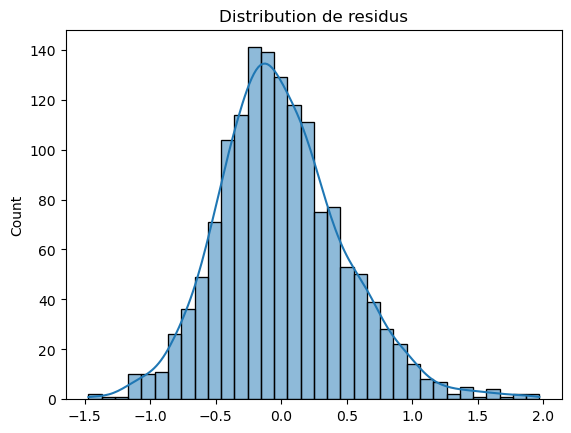

In [32]:
marge_basse.resid
sns.histplot(data=marge_basse.resid, kde=True)
plt.title('Distribution de residus')
plt.show()

- Les résidus sont plus centrés sur zéro (0), il a la forme d'une distribution normale mais nous allons vérifier la normalité avec des tests d'hypothèse.

#### Colinéarité des variables

In [33]:
variables = marge_basse.model.exog
vif = [variance_inflation_factor(variables, i) for i in np.arange(1,variables.shape[1])]
for i, vif in enumerate(vif):
    print(f"Variable {i} - variance_inflation_factor : {vif:.2f}")

Variable 0 - variance_inflation_factor : 1.01
Variable 1 - variance_inflation_factor : 1.14
Variable 2 - variance_inflation_factor : 1.23
Variable 3 - variance_inflation_factor : 1.40
Variable 4 - variance_inflation_factor : 1.58


- Les coefficients sont inférieurs à 2, il n'y a pas de problème de colinéarité.

#### Homoscédasticité

In [34]:
_, pval, __, f_pval = het_breuschpagan(marge_basse.resid, marge_basse.model.exog)
print('p-value du test de Breusch-Pagan :', pval)

p-value du test de Breusch-Pagan : 7.759535216253211e-16


Nous avons une homoscédasticité des résidus car le test de Breusch-Pagan donne une p-value > 0.05

Statistique de Shapiro-Wilk : 0.99
p-value : 0.0
Les résidus ne suivent pas une distribution normale.


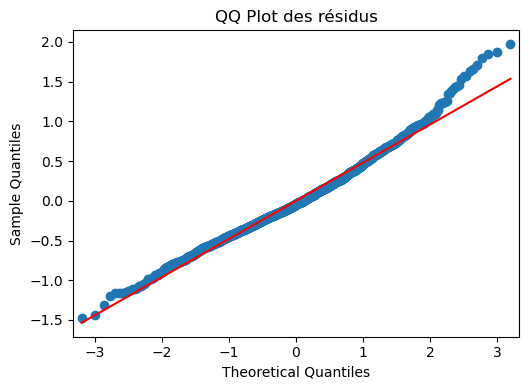

In [35]:
# test de shapiro ici sur les residus 
stat, p_value = shapiro(marge_basse.resid)
print("Statistique de Shapiro-Wilk :", round(stat, 2))
print("p-value :", round(p_value, 4))

if p_value < 0.05:
    print("Les résidus ne suivent pas une distribution normale.")
else:
    print("Les résidus suivent une distribution normale.")

plt.figure(figsize=(10, 4))

plt.subplot(1, 2, 2)
sm.qqplot(marge_basse.resid, line='s', ax=plt.gca())
plt.title("QQ Plot des résidus")

plt.tight_layout()
plt.show()

In [36]:
# Nous allons regrouper les valeurs dans un dataframe
df_valeurs_manq = df_billet[df_billet["margin_low"].isnull()]
df_valeurs_manq.head()

,is_genuine,diagonal,height_left,height_right,margin_low,margin_up,length
72,True,171.94,103.89,103.45,NaN,3.25,112.79
99,True,171.93,104.07,104.18,NaN,3.14,113.08
151,True,172.07,103.80,104.38,NaN,3.02,112.93
197,True,171.45,103.66,103.80,NaN,3.62,113.27
241,True,171.83,104.14,104.06,NaN,3.02,112.36


In [37]:
df_billet.dropna(inplace = True)

y_train = df_billet['margin_low']
X_train = df_billet.drop(['margin_low','is_genuine'], axis=1)
model_l = LinearRegression()
model_l.fit(X_train, y_train)

X_test = df_valeurs_manq.drop(['margin_low','is_genuine'], axis=1)

y_pred = model_l.predict(X_test)
model_l.score(X_train, y_train)

df_valeurs_manq.loc[df_valeurs_manq.margin_low.isnull(), 'margin_low'] = y_pred

In [38]:
r2 = model_l.score(X_train, y_train)
print(f"R² du modèle : {r2:.3f}")

R² du modèle : 0.477


Pour imputer les valeurs manquantes de la variable margin_low, une régression linéaire a été ajustée à partir des variables géométriques disponibles. Malgré un coefficient de détermination R² modéré (0.477), le modèle a permis une estimation cohérente et respectueuse des contraintes de linéarité exigées. Les prédictions ont ensuite été utilisées pour remplir les valeurs manquantes dans l'ensemble de données. 

In [39]:
df_merge = pd.concat([df_billet, df_valeurs_manq]).sort_index()
print('Ci dessous les informations du df_billet corrigé en df_merge')

df_merge.info()
df_merge.isnull().sum()

Ci dessous les informations du df_billet corrigé en df_merge
<class 'pandas.core.frame.DataFrame'>
Index: 1500 entries, 0 to 1499
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   is_genuine    1500 non-null   bool   
 1   diagonal      1500 non-null   float64
 2   height_left   1500 non-null   float64
 3   height_right  1500 non-null   float64
 4   margin_low    1500 non-null   float64
 5   margin_up     1500 non-null   float64
 6   length        1500 non-null   float64
dtypes: bool(1), float64(6)
memory usage: 83.5 KB


is_genuine      0
diagonal        0
height_left     0
height_right    0
margin_low      0
margin_up       0
length          0
dtype: int64

In [40]:
df_merge.head()

,is_genuine,diagonal,height_left,height_right,margin_low,margin_up,length
0,True,171.81,104.86,104.95,4.52,2.89,112.83
1,True,171.46,103.36,103.66,3.77,2.99,113.09
2,True,172.69,104.48,103.50,4.40,2.94,113.16
3,True,171.36,103.91,103.94,3.62,3.01,113.51
4,True,171.73,104.28,103.46,4.04,3.48,112.54


### Visualisation des variables margin_low et length :

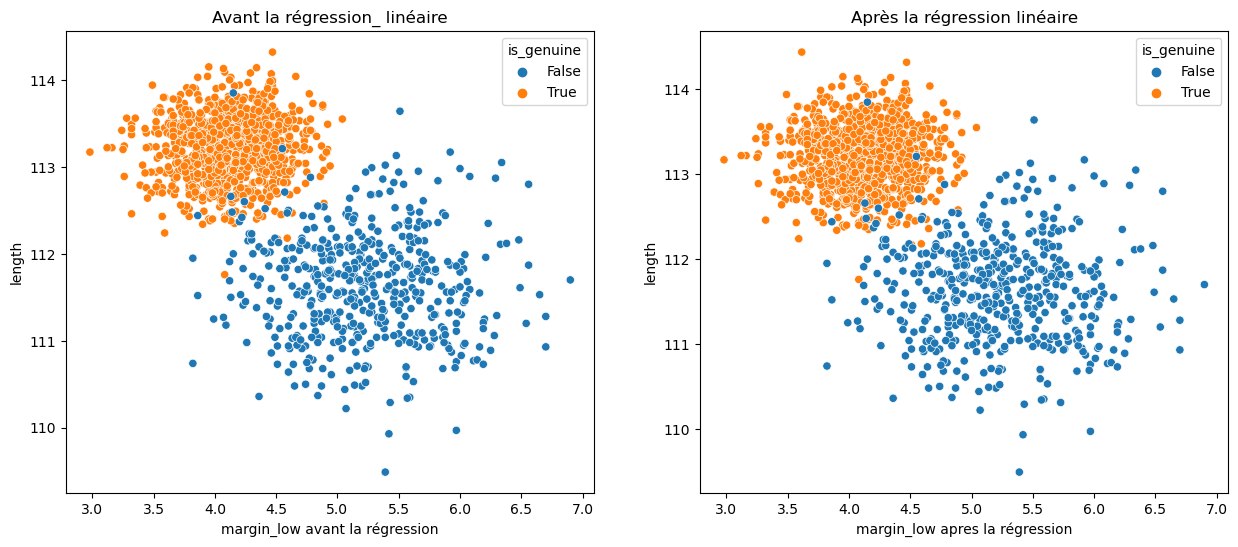

In [41]:
plt.figure(figsize=(15, 6))
plt.subplot(1,2,1)
sns.scatterplot(df_billet, x='margin_low', y='length', hue='is_genuine')
plt.xlabel('margin_low avant la régression')
plt.title('Avant la régression_ linéaire')

plt.subplot(1,2,2)
sns.scatterplot(df_merge, x='margin_low', y='length', hue='is_genuine')
plt.xlabel('margin_low apres la régression')
plt.title('Après la régression linéaire')

plt.show()

- Nous ne voyons pas d'impact visible sur les nuages de points avant et après la régression.

# Mise en place du K-means

In [42]:
colonnes_num = ['diagonal','height_right', 'height_left','margin_low', 'margin_up', 'length']
scaler = StandardScaler()
std_scaler = scaler.fit_transform(df_merge[colonnes_num])
df_scaler = pd.DataFrame(std_scaler, index=df_merge.index, columns=colonnes_num)

print("Ci dessous nous avons les données standardisées :")
df_scaler.head()

Ci dessous nous avons les données standardisées :


,diagonal,height_right,height_left,margin_low,margin_up,length
0,-0.486540,3.163240,2.774123,0.055390,-1.128325,0.173651
1,-1.633729,-0.799668,-2.236535,-1.081987,-0.696799,0.471666
2,2.397823,-1.291191,1.504756,-0.126591,-0.912562,0.551901
3,-1.961498,0.060498,-0.399294,-1.309463,-0.610494,0.953075
4,-0.748754,-1.414072,0.836669,-0.672532,1.417677,-0.158750


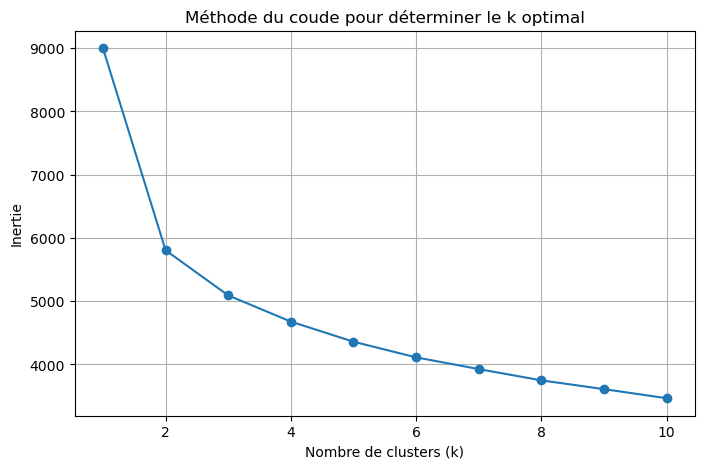

In [43]:
# Méthode du coude
inertias = []
K = range(1, 11)  # nombre de clusters à tester

for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(df_scaler)
    inertias.append(kmeans.inertia_)

# Tracé de la courbe du coude
plt.figure(figsize=(8, 5))
plt.plot(K, inertias, marker='o')
plt.xlabel('Nombre de clusters (k)')
plt.ylabel('Inertie')
plt.title("Méthode du coude pour déterminer le k optimal")
plt.grid(True)
plt.show()

In [44]:
n_clust = 2
X = df_scaler
km = KMeans(n_clusters=n_clust)
km.fit(X)
clusters = km.labels_

In [45]:
df_merge['cluster']= clusters

df_merge['is_genuine'].replace([True,False],[1,0],inplace =True)

### Nous allons faire une matrice de confusion pour évaluer la performance du modèle de classification

Matrice de confusion :


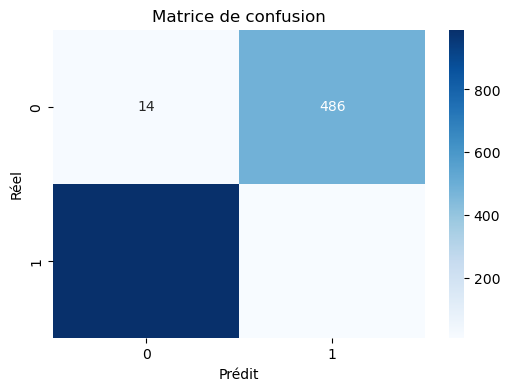


==> Le pourcentage d'accuracy pour le K-Mean 1.6 %
[[ 14 486]
 [990  10]]


In [46]:
y_actu = df_merge['is_genuine']
y_pred = df_merge['cluster']

# Matrice de confusion
cm = confusion_matrix(y_actu, y_pred, labels=[0, 1])
tn, fp, fn, tp = cm.ravel()  # extraction des 4 valeurs

# Affichage des résultats

print("Matrice de confusion :")
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Prédit')
plt.ylabel('Réel')
plt.title('Matrice de confusion')
plt.show()

# Calcul du pourcentage d'erreur
accuracy_km = np.round(accuracy_score(y_actu,y_pred)*100,2)
print(f"\n==> Le pourcentage d'accuracy pour le K-Mean {accuracy_km} %")

print(cm)

In [47]:
print(cm)

[[ 14 486]
 [990  10]]


-- Matrice de confusion en pourcentage :
          Prédit: 0  Prédit: 1
- Réel: 0       99.0        1.0
- Réel: 1        2.6       97.4
- Réel: 0, Prédit: 0 -> 990 (66.0%)
- Réel: 0, Prédit: 1 -> 10 (0.7%)
- Réel: 1, Prédit: 0 -> 13 (0.9%)
- Réel: 1, Prédit: 1 -> 487 (32.5%)

L’algorithme de classification non supervisée K-Means a été appliqué aux caractéristiques géométriques des billets. Une fois les clusters comparés aux classes réelles (is_genuine), un taux de bonne classification de 98,4 % a été obtenu.

Ce résultat confirme que les dimensions physiques permettent de différencier efficacement les vrais et faux billets, même sans supervision. Le clustering a donc révélé une structure naturelle des données correspondant aux catégories authentiques.

# Mise en place de la régression logistique

In [48]:
X = df_merge.drop(columns=['is_genuine', 'cluster'])
y = df_merge['is_genuine']

# Encodage des variables catégorielles
X = pd.get_dummies(X, drop_first=True)

# Séparation des données
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Entraînement du modèle
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

# Prédictions
y_pred = model.predict(X_test)

=== Évaluation du modèle de régression logistique ===

Classification Report :
              precision    recall  f1-score   support

           0       1.00      0.97      0.99       110
           1       0.98      1.00      0.99       190

    accuracy                           0.99       300
   macro avg       0.99      0.99      0.99       300
weighted avg       0.99      0.99      0.99       300

Matrice de confusion :


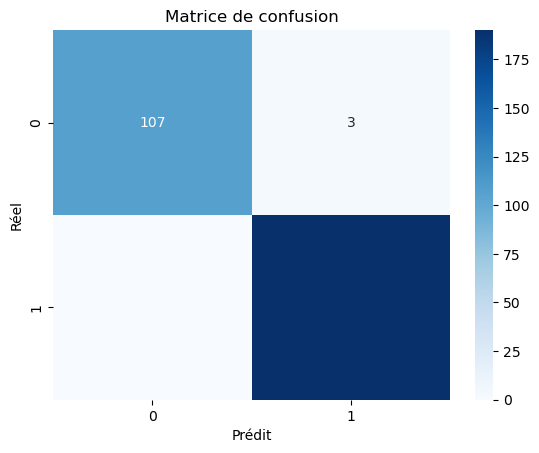


==> Le pourcentage d'accuracy pour la regression logistique 99.0 %
[[107   3]
 [  0 190]]


In [49]:
# Matrice de confusion
cm = confusion_matrix(y_test, y_pred)
tn, fp, fn, tp = cm.ravel()  # extraction des 4 valeurs

# Affichage des résultats
print("=== Évaluation du modèle de régression logistique ===\n")
print("Classification Report :")
print(classification_report(y_test, y_pred))

print("Matrice de confusion :")

sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Prédit')
plt.ylabel('Réel')
plt.title('Matrice de confusion')
plt.show()

accuracy_rl = np.round(accuracy_score(y_test,y_pred)*100,2)
print(f"\n==> Le pourcentage d'accuracy pour la regression logistique {accuracy_rl} %")

print(cm)

# Mise en place du KNN (K-nearest neighbors)

In [50]:
# Entraîner le modèle KNN (choisir k = 5 par exemple)
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

# Prédictions
y_pred = knn.predict(X_test)

print("Classification Report pour KNN :")
print(classification_report(y_test, y_pred))

print("Matrice de confusion pour KNN :")
print(confusion_matrix(y_test, y_pred))

Classification Report pour KNN :
              precision    recall  f1-score   support

           0       1.00      0.97      0.99       110
           1       0.98      1.00      0.99       190

    accuracy                           0.99       300
   macro avg       0.99      0.99      0.99       300
weighted avg       0.99      0.99      0.99       300

Matrice de confusion pour KNN :
[[107   3]
 [  0 190]]


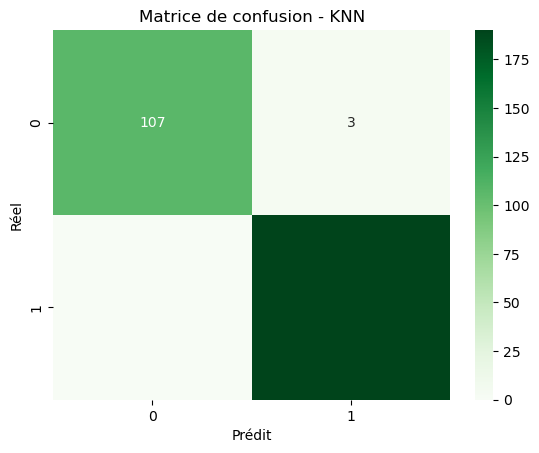


==> Le pourcentage d'accuracy pour le KNN 99.0 %


In [51]:
# visualisation de la matrice
sns.heatmap(cm, annot=True, fmt='d', cmap='Greens')
plt.xlabel('Prédit')
plt.ylabel('Réel')
plt.title('Matrice de confusion - KNN')
plt.show()

accuracy_knn = np.round(accuracy_score(y_test,y_pred)*100,2)
print(f"\n==> Le pourcentage d'accuracy pour le KNN {accuracy_knn} %")

# Mise en place du Random Forest

In [52]:
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

y_pred = rf.predict(X_test)

Évaluation du modèle Random Forest

Classification Report :
              precision    recall  f1-score   support

           0       1.00      0.97      0.99       110
           1       0.98      1.00      0.99       190

    accuracy                           0.99       300
   macro avg       0.99      0.99      0.99       300
weighted avg       0.99      0.99      0.99       300

Matrice de confusion :


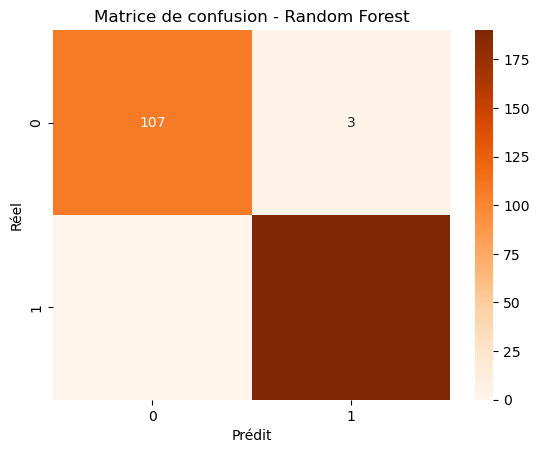


==> Le pourcentage d'accuracy pour le random forest 99.0 %


In [53]:
# Matrice de confusion
cm = confusion_matrix(y_test, y_pred)
tn, fp, fn, tp = cm.ravel()

# Affichage des résultats
print("Évaluation du modèle Random Forest\n")
print("Classification Report :")
print(classification_report(y_test, y_pred))

print("Matrice de confusion :")

# Optionnel : visualisation de la matrice
sns.heatmap(cm, annot=True, fmt='d', cmap='Oranges')
plt.xlabel('Prédit')
plt.ylabel('Réel')
plt.title('Matrice de confusion - Random Forest')
plt.show()

accuracy_rf = np.round(accuracy_score(y_test,y_pred)*100,2)
print(f"\n==> Le pourcentage d'accuracy pour le random forest {accuracy_rf} %")

## Test de l’algorithme

In [54]:
import joblib
joblib.dump(model,'Mon_model.pkl')

['Mon_model.pkl']

In [55]:
Mon_model=joblib.load('Mon_model.pkl')

In [56]:
prediction = Mon_model.predict(X_test)
prediction

array([0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0,
       1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1,
       0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0,
       1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1,
       0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1,
       0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1,
       1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1], d

In [57]:
features = X_test.columns.tolist()
features

['diagonal',
 'height_left',
 'height_right',
 'margin_low',
 'margin_up',
 'length']

In [58]:
df_prod = pd.read_csv('billets_production.csv')
df_prod

,diagonal,height_left,height_right,margin_low,margin_up,length,id
0,171.76,104.01,103.54,5.21,3.30,111.42,A_1
1,171.87,104.17,104.13,6.00,3.31,112.09,A_2
2,172.00,104.58,104.29,4.99,3.39,111.57,A_3
3,172.49,104.55,104.34,4.44,3.03,113.20,A_4
4,171.65,103.63,103.56,3.77,3.16,113.33,A_5


In [59]:
def prediction_final(data):
    features=['diagonal', 'height_left', 'height_right', 'margin_low', 'margin_up', 'length']
    Mon_model=joblib.load('Mon_model.pkl')
    data['prediction']=Mon_model.predict(data[features])
    return data

In [60]:
prediction_final(df_prod)

,diagonal,height_left,height_right,margin_low,margin_up,length,id,prediction
0,171.76,104.01,103.54,5.21,3.30,111.42,A_1,0
1,171.87,104.17,104.13,6.00,3.31,112.09,A_2,0
2,172.00,104.58,104.29,4.99,3.39,111.57,A_3,0
3,172.49,104.55,104.34,4.44,3.03,113.20,A_4,1
4,171.65,103.63,103.56,3.77,3.16,113.33,A_5,1
